# DESAFIO

**Desenvolva um modelo de predição utilizando um conjunto de dados que detalha a geração horária de
energia elétrica no Brasil, de 2000 a 2018. Apesar da granularidade horária dos dados, o modelo deve
focar em previsões na frequência mensal. Você tem a liberdade de escolher como agrupar os dados
para a previsão - seja por total geral, por tipo de usina, tipo de combustível, região ou estado. Essa
escolha deve ser justificada com base na relevância e impacto esperado no resultado da previsão. Para
a validação do modelo, utilize os dados correspondentes aos anos de 2019 e 2020**


# IMPORTAÇÃO DE PACOTES

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

# IMPORTAÇÃO DOS DADOS

## TABELAS DOS DADOS DE 2000

In [2]:
dados = pd.read_csv('GERACAO_USINA2000.csv', sep=';', decimal='.') 
dados.head(1)


,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,01/01/2000 00:00,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Tucuruí,UHE.PH.PA.002889-4.01,242.250.000.000


In [3]:
del dados['id_subsistema']
del dados['id_estado']
del dados['ceg']

In [4]:
dados['din_instante'] = pd.to_datetime(dados['din_instante'],errors='coerce')


In [5]:
dados = dados.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

### TABELAS DE DADOS 2001

In [6]:
dados1 = pd.read_csv('GERACAO_USINA_2001.csv', sep=';', decimal='.')

In [7]:
del dados1['id_subsistema']
del dados1['id_estado']
del dados1['ceg']

In [8]:
dados1 = dados1.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [9]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054365 entries, 0 to 1054364
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   din_instante            1054365 non-null  object 
 1   nom_subsistema          1054365 non-null  object 
 2   nom_estado              1054365 non-null  object 
 3   cod_modalidadeoperacao  1054365 non-null  object 
 4   nom_tipousina           1054365 non-null  object 
 5   nom_tipo_combustivel    1054365 non-null  object 
 6   nom_usina               1054365 non-null  object 
 7   val_geracao             1054365 non-null  float64
dtypes: float64(1), object(7)
memory usage: 64.4+ MB


### TABELAS DADOS 2002

In [10]:
dados2 = pd.read_csv('GERACAO_USINA_2002.csv', sep=';', decimal='.')

In [11]:
dados2 = dados2.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [12]:
dados2.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2002-01-01 00:00:00,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Tucuruí,UHE.PH.PA.002889-4.01,3309.1


In [13]:
del dados2['id_subsistema']
del dados2['id_estado']
del dados2['ceg']

In [14]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423928 entries, 0 to 1423927
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   din_instante            1423928 non-null  object 
 1   nom_subsistema          1423928 non-null  object 
 2   nom_estado              1423928 non-null  object 
 3   cod_modalidadeoperacao  1423928 non-null  object 
 4   nom_tipousina           1423928 non-null  object 
 5   nom_tipo_combustivel    1423928 non-null  object 
 6   nom_usina               1423928 non-null  object 
 7   val_geracao             1423928 non-null  float64
dtypes: float64(1), object(7)
memory usage: 86.9+ MB


### TABELAS DADOS 2003

In [15]:
dados3 = pd.read_csv('GERACAO_USINA_2003.csv', sep=';', decimal='.')

In [16]:
dados3 = dados3.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [17]:
dados3.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2003-01-01 00:00:00,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Tucuruí,UHE.PH.PA.002889-4.01,2356.1


In [18]:
del dados3['id_subsistema']
del dados3['id_estado']
del dados3['ceg']

In [19]:
dados3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740448 entries, 0 to 1740447
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 106.2+ MB


### TABELAS DADOS 2004

In [20]:
dados4 = pd.read_csv('GERACAO_USINA_2004.csv', sep=';', decimal='.')

In [21]:
dados4 = dados4.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [22]:
dados4.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2004-01-01 00:00:00,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Curuá-Una,UHE.PH.PA.027130-6.01,12.0


In [23]:
del dados4['id_subsistema']
del dados4['id_estado']
del dados4['ceg']

In [24]:
dados4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799984 entries, 0 to 1799983
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 109.9+ MB


### TABELAS DADOS 2005

In [25]:
dados5 = pd.read_csv('GERACAO_USINA_2005.csv', sep=';', decimal='.')

In [26]:
dados5 = dados5.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [27]:
dados5.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2005-01-01 00:00:00,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Tucuruí,UHE.PH.PA.002889-4.01,2234.7


In [28]:
del dados5['id_subsistema']
del dados5['id_estado']
del dados5['ceg']

In [29]:
dados5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762877 entries, 0 to 1762876
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 107.6+ MB


### TABELAS DADOS 2006

In [30]:
dados6 = pd.read_csv('GERACAO_USINA_2006.csv', sep=';', decimal='.')

In [31]:
dados6 = dados6.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [32]:
dados6.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,id_ons,ceg,val_geracao
0,2006-01-01 00:00:00,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Tucuruí,PATU,UHE.PH.PA.002889-4.01,4613.86


In [33]:
del dados6['id_subsistema']
del dados6['id_estado']
del dados6['ceg']
del dados6['id_ons']

In [34]:
dados6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456679 entries, 0 to 1456678
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   din_instante            1456679 non-null  object 
 1   nom_subsistema          1456679 non-null  object 
 2   nom_estado              1456679 non-null  object 
 3   cod_modalidadeoperacao  1456679 non-null  object 
 4   nom_tipousina           1456679 non-null  object 
 5   nom_tipo_combustivel    1456679 non-null  object 
 6   nom_usina               1456679 non-null  object 
 7   val_geracao             1456583 non-null  float64
dtypes: float64(1), object(7)
memory usage: 88.9+ MB


### TABELAS DADOS 2007

In [35]:
dados7 = pd.read_csv('GERACAO_USINA_2007.csv', sep=';', decimal='.')

In [36]:
dados7 = dados7.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [37]:
dados7.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2007-01-01 00:00:00,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Tucuruí,UHE.PH.PA.002889-4.01,2148.85


In [38]:
del dados7['id_subsistema']
del dados7['id_estado']
del dados7['ceg']

In [39]:
dados7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518067 entries, 0 to 1518066
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   din_instante            1518067 non-null  object 
 1   nom_subsistema          1518067 non-null  object 
 2   nom_estado              1518067 non-null  object 
 3   cod_modalidadeoperacao  1518067 non-null  object 
 4   nom_tipousina           1518067 non-null  object 
 5   nom_tipo_combustivel    1518067 non-null  object 
 6   nom_usina               1518067 non-null  object 
 7   val_geracao             1518067 non-null  float64
dtypes: float64(1), object(7)
memory usage: 92.7+ MB


### TABELAS DADOS 2008

In [40]:
dados8 = pd.read_csv('GERACAO_USINA_2008.csv', sep=';', decimal='.')

In [41]:
dados8 = dados8.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [42]:
dados8.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2008-01-01 00:00:00,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Curuá-Una,UHE.PH.PA.027130-6.01,18.0


In [43]:
del dados8['id_subsistema']
del dados8['id_estado']
del dados8['ceg']

### TABELAS DADOS 2009

In [44]:
dados9 = pd.read_csv('GERACAO_USINA_2009.csv', sep=';', decimal='.')

In [45]:
dados9 = dados9.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [46]:
dados9.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2009-01-01 00:00:00,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Curuá-Una,UHE.PH.PA.027130-6.01,30.45


In [47]:
del dados9['id_subsistema']
del dados9['id_estado']
del dados9['ceg']

In [48]:
dados9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806338 entries, 0 to 1806337
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 110.3+ MB


### TABELAS DADOS 2010

In [49]:
dados10 = pd.read_csv('GERACAO_USINA_2010.csv', sep=';', decimal='.')

In [50]:
dados10 = dados10.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [51]:
dados10.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2010-01-01 00:00:00,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Óleo Combustível,Geramar I,UTE.PE.MA.029705-4.01,0.0


In [52]:
del dados10['id_subsistema']
del dados10['id_estado']
del dados10['ceg']

In [53]:
dados10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084541 entries, 0 to 2084540
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 127.2+ MB


### TABELAS DADOS 2011

In [54]:
dados11 = pd.read_csv('GERACAO_USINA_2011.csv', sep=';', decimal='.')

In [55]:
dados11 = dados11.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [56]:
dados11.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2011-01-01 00:00:00,N,NORTE,MA,MARANHAO,TIPO I,TÉRMICA,Óleo Combustível,Geramar II,UTE.PE.MA.029668-6.01,0.0


In [57]:
del dados11['id_subsistema']
del dados11['id_estado']
del dados11['ceg']

In [58]:
dados11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310919 entries, 0 to 2310918
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 141.0+ MB


### TABELAS DADOS 2012

In [59]:
dados12 = pd.read_csv('GERACAO_USINA_2012.csv', sep=';', decimal='.')

In [60]:
dados12 = dados12.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [61]:
dados12.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2012-01-01 00:00:00,N,NORTE,MA,MARANHAO,TIPO I,HIDROELÉTRICA,Hidráulica,Estreito,UHE.PH.MA.028863-2.01,543.29


In [62]:
del dados12['id_subsistema']
del dados12['id_estado']
del dados12['ceg']

In [63]:
dados12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651207 entries, 0 to 2651206
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 161.8+ MB


### TABELAS DADOS 2013

In [64]:
dados13 = pd.read_csv('GERACAO_USINA_2013.csv', sep=';', decimal='.')

In [65]:
dados13 = dados13.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [66]:
dados13.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2013-01-01 00:00:00,N,NORTE,MA,MARANHAO,TIPO I,HIDROELÉTRICA,Hidráulica,Estreito,UHE.PH.MA.028863-2.01,475.59


In [67]:
del dados13['id_subsistema']
del dados13['id_estado']
del dados13['ceg']

In [68]:
dados13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964021 entries, 0 to 2964020
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 180.9+ MB


### TABELAS DADOS 2014

In [69]:
dados14 = pd.read_csv('GERACAO_USINA_2014.csv', sep=';', decimal='.')

In [70]:
dados14 = dados14.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [71]:
dados14.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2014-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,HIDROELÉTRICA,Hidráulica,Balbina,UHE.PH.AM.000190-2.01,122.83


In [72]:
del dados14['id_subsistema']
del dados14['id_estado']
del dados14['ceg']

In [73]:
dados14.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522817 entries, 0 to 3522816
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 215.0+ MB


### TABELAS DADOS 2015

In [74]:
dados15 = pd.read_csv('GERACAO_USINA_2015.csv', sep=';', decimal='.')

In [75]:
dados15 = dados15.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [76]:
dados15.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2015-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,HIDROELÉTRICA,Hidráulica,Balbina,UHE.PH.AM.000190-2.01,76.616


In [77]:
del dados15['id_subsistema']
del dados15['id_estado']
del dados15['ceg']

In [78]:
dados15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966455 entries, 0 to 3966454
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 242.1+ MB


### TABELAS DADOS 2016

In [79]:
dados16 = pd.read_csv('GERACAO_USINA_2016.csv', sep=';', decimal='.')

In [80]:
dados16 = dados16.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [81]:
dados16.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2016-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,HIDROELÉTRICA,Hidráulica,Balbina,UHE.PH.AM.000190-2.01,61.247


In [82]:
del dados16['id_subsistema']
del dados16['id_estado']
del dados16['ceg']

In [83]:
dados16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206299 entries, 0 to 4206298
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 256.7+ MB


### TABELAS DADOS 2017

In [84]:
dados17 = pd.read_csv('GERACAO_USINA_2017.csv', sep=';', decimal='.')

In [85]:
dados17 = dados17.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [86]:
dados17.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2017-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,HIDROELÉTRICA,Hidráulica,Balbina,UHE.PH.AM.000190-2.01,61.024


In [87]:
del dados17['id_subsistema']
del dados17['id_estado']
del dados17['ceg']

In [88]:
dados17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212102 entries, 0 to 4212101
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 257.1+ MB


### TABELAS DADOS 2018

In [89]:
dados18 = pd.read_csv('GERACAO_USINA_2018.csv', sep=';', decimal='.')

In [90]:
dados18 = dados18.rename(columns={'nom_tipocombustivel':'nom_tipo_combustivel'})

In [91]:
dados18.head(1)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,ceg,val_geracao
0,2018-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,HIDROELÉTRICA,Hidráulica,Balbina,UHE.PH.AM.000190-2.01,123.301


In [92]:
del dados18['id_subsistema']
del dados18['id_estado']
del dados18['ceg']

In [93]:
dados18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4288656 entries, 0 to 4288655
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   din_instante            object 
 1   nom_subsistema          object 
 2   nom_estado              object 
 3   cod_modalidadeoperacao  object 
 4   nom_tipousina           object 
 5   nom_tipo_combustivel    object 
 6   nom_usina               object 
 7   val_geracao             float64
dtypes: float64(1), object(7)
memory usage: 261.8+ MB


### FAZENDO A JUNÇÃO DAS TABELAS

In [94]:
tabelas_mescladas = pd.concat([dados, dados1,dados2,dados3,dados4,dados5,dados6,dados7,dados8,dados9,dados10,dados11,dados12,dados13,dados14,dados15,

dados16,dados17,dados18])

In [95]:
tabelas_mescladas.shape

(45461857, 8)

In [96]:
tabelas_mescladas.head(1)

,din_instante,nom_subsistema,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,val_geracao
0,2000-01-01 00:00:00,NORTE,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Tucuruí,242.250.000.000


# ANÁLISE EXPLORATÓRIA

### CONVERTENDO A VARIAVÉIS

In [97]:
tabelas_mescladas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45461857 entries, 0 to 4288655
Data columns (total 8 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   din_instante            object
 1   nom_subsistema          object
 2   nom_estado              object
 3   cod_modalidadeoperacao  object
 4   nom_tipousina           object
 5   nom_tipo_combustivel    object
 6   nom_usina               object
 7   val_geracao             object
dtypes: object(8)
memory usage: 3.0+ GB


In [98]:
tabelas_mescladas['val_geracao'] = pd.to_numeric(tabelas_mescladas['val_geracao'], errors='coerce')

In [99]:
tabelas_mescladas['din_instante'] = pd.to_datetime(tabelas_mescladas['din_instante'], format='%Y-%m-%d %H:%M:%S')

### VERIFICANDO SE HÁ VALORES NULOS E DUPLICADOS

In [100]:
(tabelas_mescladas.isnull().sum() / len(tabelas_mescladas['val_geracao']))*100

din_instante              1.326651
nom_subsistema            0.000000
nom_estado                0.000000
cod_modalidadeoperacao    0.000053
nom_tipousina             0.000000
nom_tipo_combustivel      0.000000
nom_usina                 0.000000
val_geracao               2.473049
dtype: float64

In [101]:
tabelas_mescladas.duplicated().sum()

609324

### EXCLUIDO OS VALORES NULOS E DUPLICADOS

In [102]:
tabelas_mescladas = tabelas_mescladas.dropna()

In [103]:
tabelas_mescladas = tabelas_mescladas.drop_duplicates()

In [104]:
tabelas_mescladas.head(1)

,din_instante,nom_subsistema,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,val_geracao
7063,2000-03-01 15:00:00,SUDESTE,RIO DE JANEIRO,TIPO I,HIDROELÉTRICA,Hidráulica,Funil (Paraíba do Sul),0.4


In [105]:
tabelas_mescladas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44330795 entries, 7063 to 4288655
Data columns (total 8 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   din_instante            datetime64[ns]
 1   nom_subsistema          object        
 2   nom_estado              object        
 3   cod_modalidadeoperacao  object        
 4   nom_tipousina           object        
 5   nom_tipo_combustivel    object        
 6   nom_usina               object        
 7   val_geracao             float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 3.0+ GB


### ESTATÍSTICA

In [106]:
tabelas_mescladas['val_geracao'].describe()

count    4.433080e+07
mean     1.865227e+02
std      5.468172e+02
min      0.000000e+00
25%      0.000000e+00
50%      3.464100e+01
75%      1.281890e+02
max      7.979900e+03
Name: val_geracao, dtype: float64

### MODA

In [107]:
from statistics import mode

mode(tabelas_mescladas['val_geracao'])

0.0

### ASSIMETRIA

In [108]:
tabelas_mescladas['val_geracao'].skew()

6.924930222691951

### CURTOSE

In [109]:
tabelas_mescladas['val_geracao'].kurt()

59.74601355306659

### HISTOGRAMA

<Axes: >

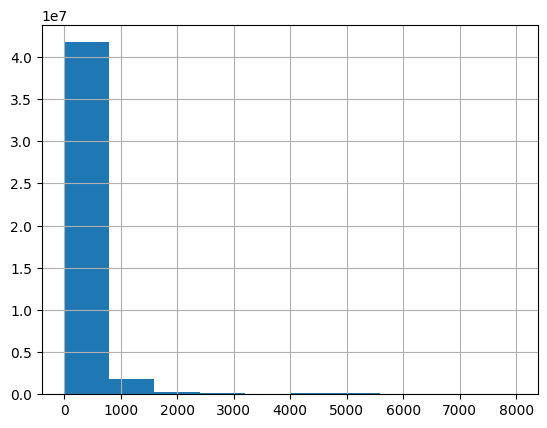

In [110]:
tabelas_mescladas['val_geracao'].hist()

## verificação de outliers 

val_geracao : float64


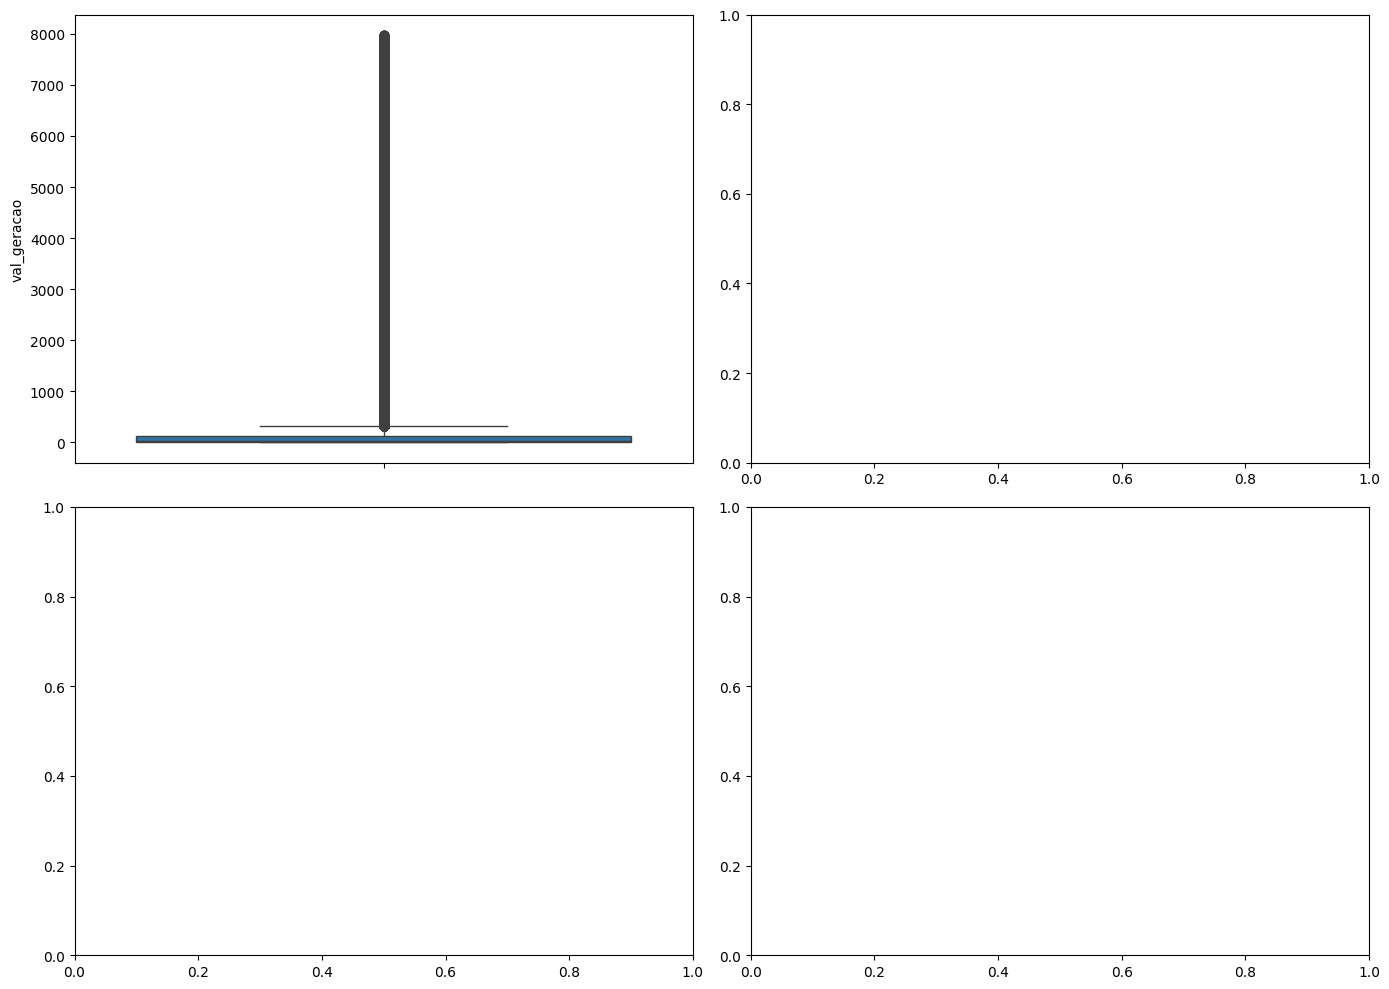

In [111]:
variaveis_numericas = []
for i in tabelas_mescladas.columns[0:16].tolist():
        if tabelas_mescladas.dtypes[i] == 'int64' or tabelas_mescladas.dtypes[i] == 'float64':            
            print(i, ':' , tabelas_mescladas.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 2) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = tabelas_mescladas, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            


### valores unicos em cada variavel

In [112]:
valores_unicos = []
for i in tabelas_mescladas.columns[0:8].tolist():
    print(i, ':', len(tabelas_mescladas[i].astype(str).value_counts()))
    valores_unicos.append(len(tabelas_mescladas[i].astype(str).value_counts()))

din_instante : 157946
nom_subsistema : 5
nom_estado : 27
cod_modalidadeoperacao : 7
nom_tipousina : 6
nom_tipo_combustivel : 10
nom_usina : 668
val_geracao : 1818758


### VERIFICANDO AS CORRELÇÕES DAS VARIAVÉIS

**AQUI ESTOU CRIANDO UMA COPIA DA BASE DE DADOS PARA CONVERTER AS VARIAVÍS STRING EM VALORES NÚMERICOS PARA A REALIZAÇÃO DA CORRELAÇÃO LINEAR QUE SO FAZEM CORRELAÇÕES COM VALORES NÚMERICOS**

In [113]:
Nova_tabela = tabelas_mescladas[['din_instante', 'nom_subsistema', 'nom_estado','cod_modalidadeoperacao','nom_tipousina','nom_tipo_combustivel', 'nom_usina', 'val_geracao']].copy()


In [114]:
Nova_tabela.shape

(44330795, 8)

In [115]:
Nova_tabela.info(1)

<class 'pandas.core.frame.DataFrame'>
Index: 44330795 entries, 7063 to 4288655
Data columns (total 8 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   din_instante            datetime64[ns]
 1   nom_subsistema          object        
 2   nom_estado              object        
 3   cod_modalidadeoperacao  object        
 4   nom_tipousina           object        
 5   nom_tipo_combustivel    object        
 6   nom_usina               object        
 7   val_geracao             float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 3.0+ GB


In [116]:
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
Nova_tabela['nom_subsistema'] = lb.fit_transform(Nova_tabela['nom_subsistema'])
Nova_tabela['nom_estado'] = lb.fit_transform(Nova_tabela['nom_estado'])
Nova_tabela['nom_tipousina'] = lb.fit_transform(Nova_tabela['nom_tipousina'])
Nova_tabela['nom_usina'] = lb.fit_transform(Nova_tabela['nom_usina'])
Nova_tabela['nom_tipo_combustivel'] = lb.fit_transform(Nova_tabela['nom_tipo_combustivel'])
Nova_tabela['cod_modalidadeoperacao'] = lb.fit_transform(Nova_tabela['cod_modalidadeoperacao'])
# Remove valores missing eventualmente gerados
Nova_tabela.dropna(inplace = True)

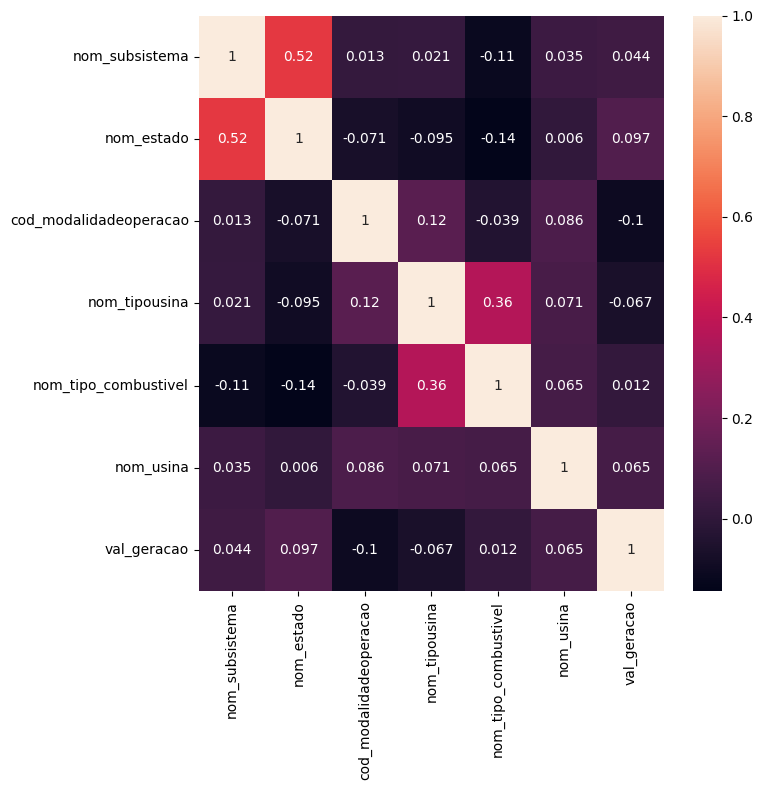

In [117]:

df_numeric = Nova_tabela.select_dtypes(include=['float64', 'int32'])

# Configurações de plot que você já especificou
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True

# Criando o heatmap apenas para as colunas numéricas
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

**Como eu converti as variáveis categórica em numérica, a confiabilidade da correlação entre variáveis categóricas convertidas em numéricas depende fortemente do método de conversão utilizado( eu usei Onehotencoding) É crucial interpretar essas correlações com cautela, considerando as limitações e as premissas de conversão. Usarei mais pra frente o código de modelos baseados em Ensemble( variavéis que tenha mais importância) porque eles podem oferecer insights mais robustos e interpretações mais confiáveis**

# ANÁLISE DE DADOS - VISUALIZAÇÃO DE DADOS

### AGRUPAMENTO DE DADOS 

In [118]:
tabelas_mescladas.groupby(tabelas_mescladas['nom_estado']).size() 

nom_estado
ACRE                    137528
ALAGOAS                 265958
AMAPA                   195719
AMAZONAS               1188666
BAHIA                  3735082
CEARA                  2952267
DISTRITO FEDERAL        298790
ESPIRITO SANTO         1117189
GOIAS                  2636995
MARANHAO                571710
MATO GROSSO            1496940
MATO GROSSO DO SUL     1279443
MINAS GERAIS           5147416
PARA                    531850
PARAIBA                 241219
PARANA                 2173991
PERNAMBUCO             1371941
PIAUI                   820871
RIO DE JANEIRO         2471845
RIO GRANDE DO NORTE    1782846
RIO GRANDE DO SUL      4430668
RONDONIA                750539
SANTA CATARINA         1815993
SAO PAULO              6331095
SERGIPE                  82092
TOCANTINS               344672
z - INTERNACIONAL       157470
dtype: int64

In [119]:
tabelas_mescladas.groupby(tabelas_mescladas['cod_modalidadeoperacao']).size() 

cod_modalidadeoperacao
Conjunto de Usinas             2914538
Pequenas Usinas (Tipo III)     2490865
TIPO I                        28967573
TIPO II-A                      2321229
TIPO II-B                       727517
TIPO II-C                      2346082
TIPO III                       4562991
dtype: int64

In [120]:
tabelas_mescladas.groupby(tabelas_mescladas['nom_tipousina']).size()

nom_tipousina
BOMBEAMENTO         17686
EOLIELÉTRICA      4911012
FOTOVOLTAICA       187940
HIDROELÉTRICA    23928303
NUCLEAR            314940
TÉRMICA          14970914
dtype: int64

In [121]:
tabelas_mescladas.groupby(tabelas_mescladas['nom_usina']).size() 

nom_usina
14 de Julho                                            87686
Aimorés                                               117610
Alcídia                                                12622
Alegrete                                              157470
Alegria I                                              69736
Alegria II                                             61121
Alta Mogiana                                           57449
Alto Chopim                                            52890
Alto Sucuriú                                           64000
Altos                                                 134075
Amador Aguiar I                                       112907
Amador Aguiar II                                      103884
Amandina                                               31508
Angelina                                               30476
Angra 1                                               148711
Angra 2                                               148711
Angra I       

In [122]:
tabelas_mescladas.groupby(tabelas_mescladas['nom_tipo_combustivel']).size()

nom_tipo_combustivel
Biomassa                 2202448
Carvão                   1333515
Eólica                   4911012
Fotovoltaica              187940
Gás                      4203898
Hidráulica              23945989
Nuclear                   314940
Resíduos Industriais      397488
Óleo Combustível         2341552
Óleo Diesel              4492013
dtype: int64

### PLOTANDO EM UM GRAFÍCO AS COLUNAS 

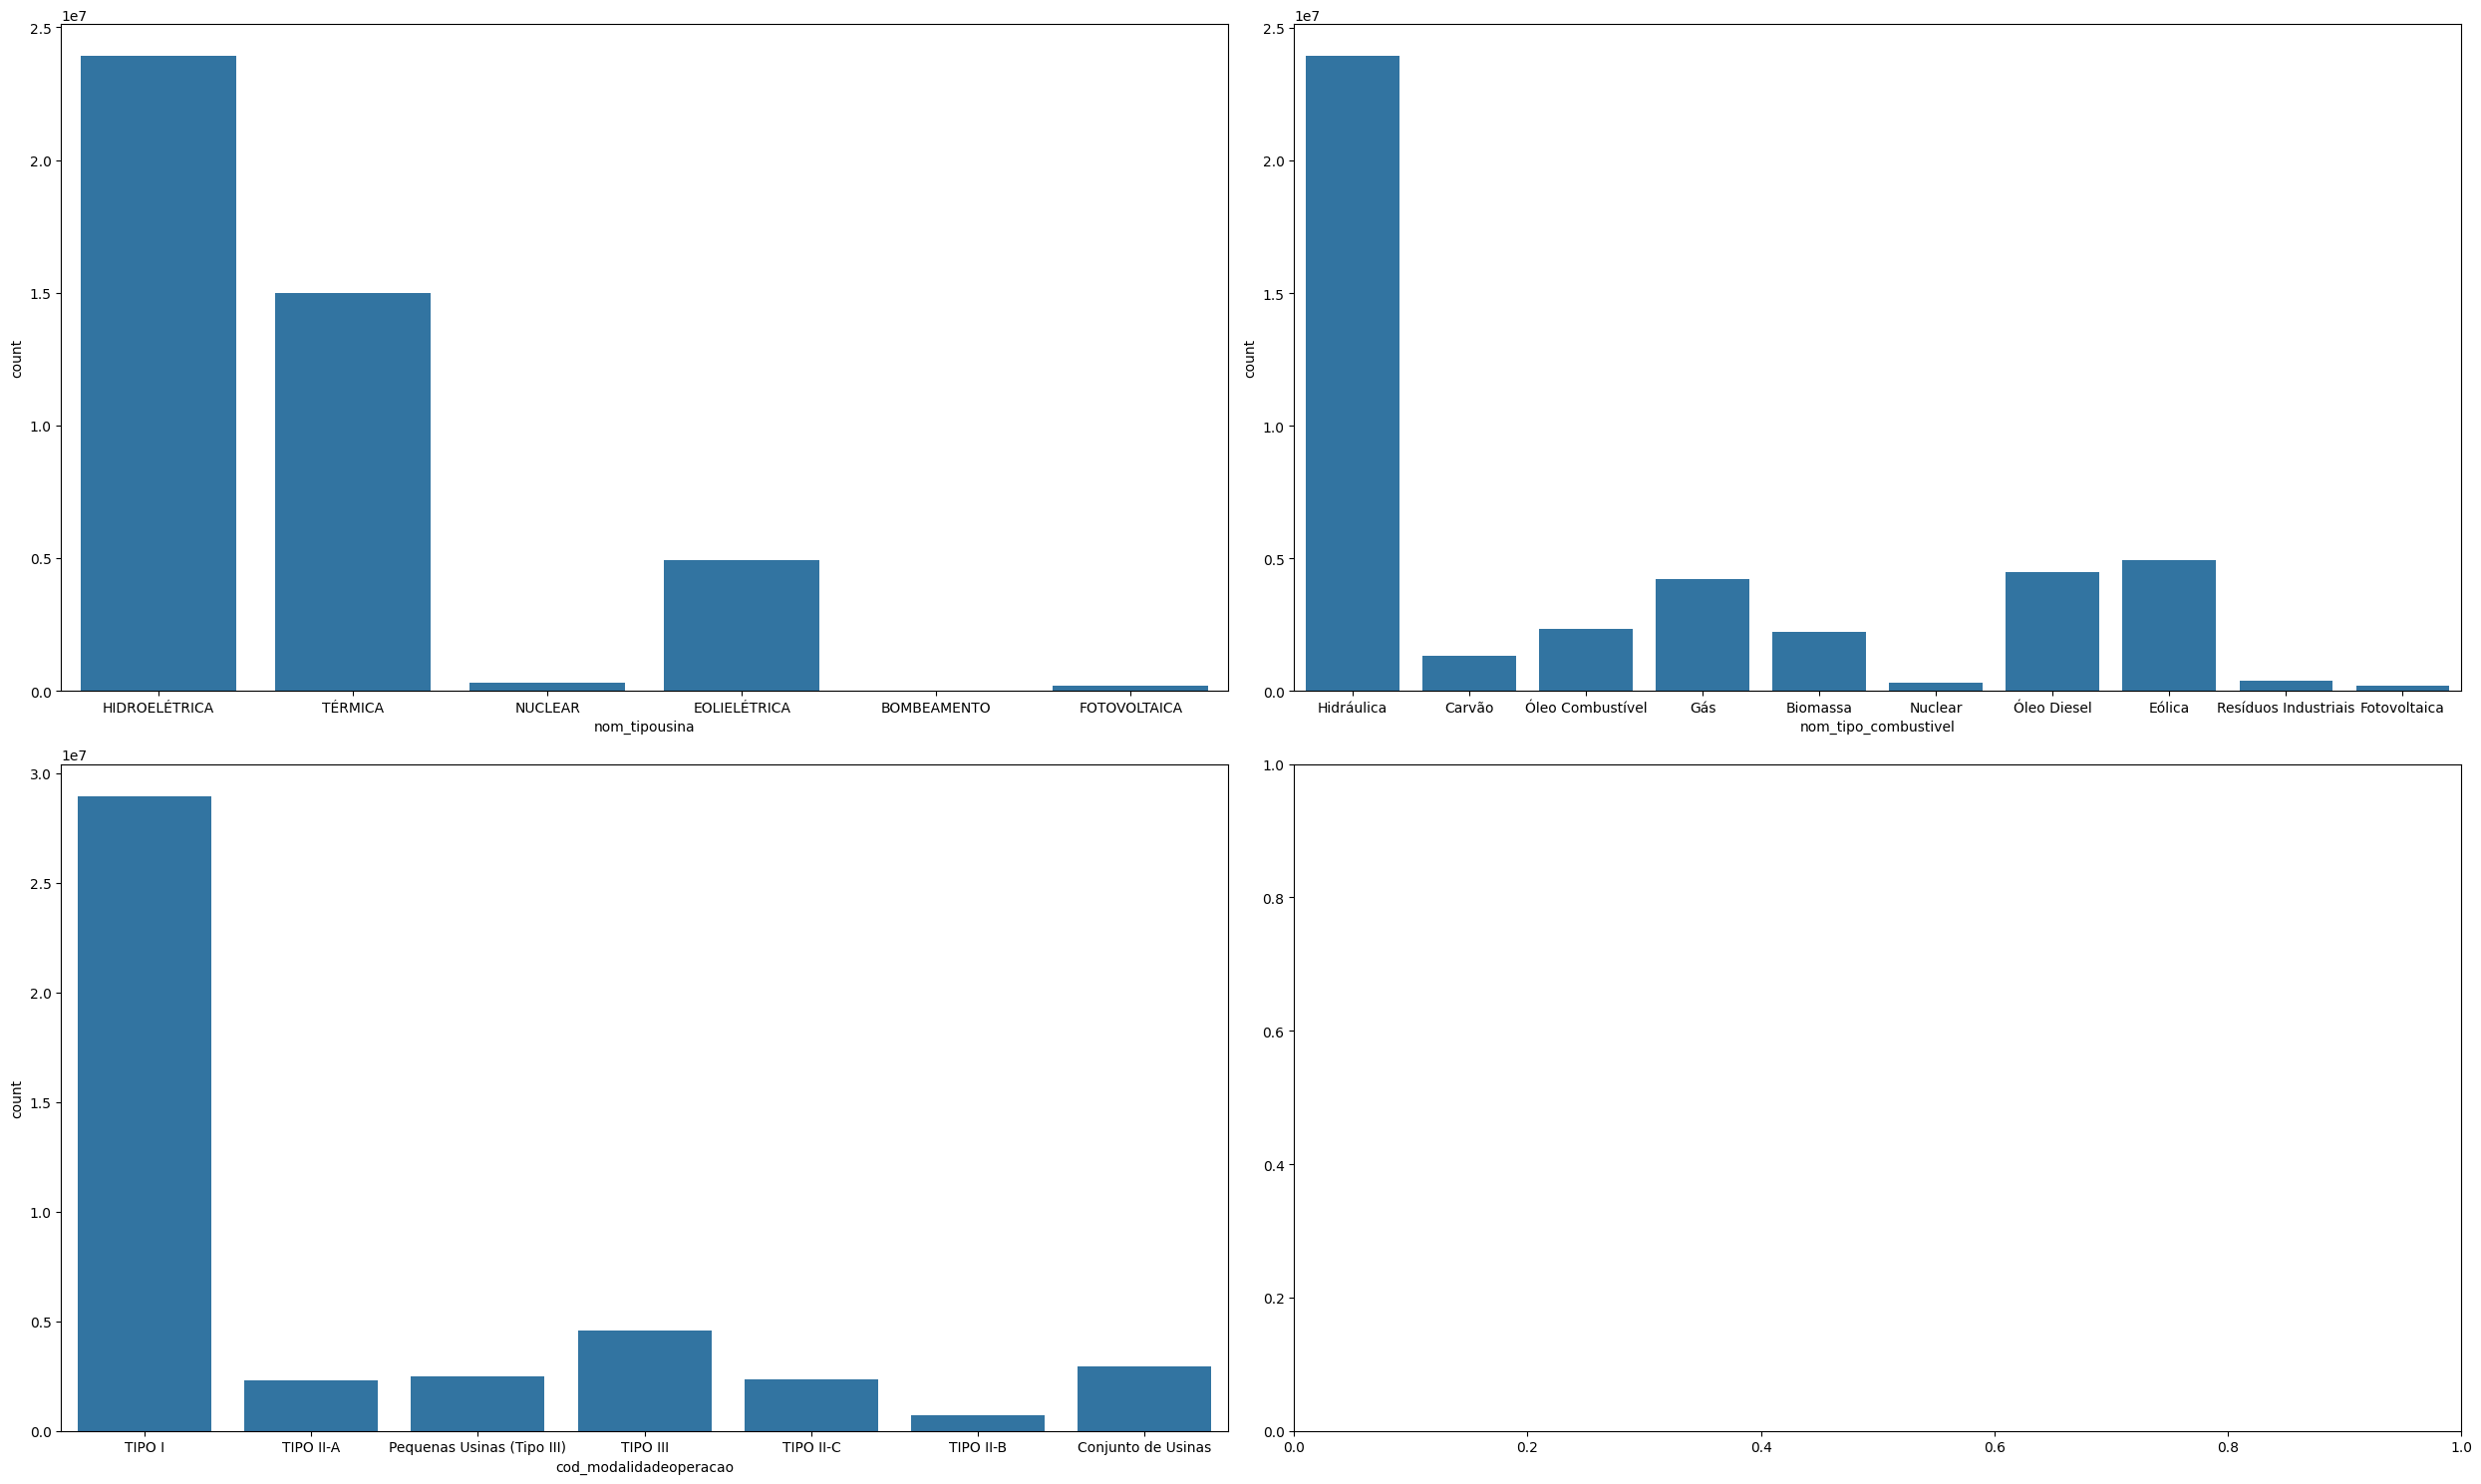

In [123]:
plt.rcParams["figure.figsize"] = [25.00, 15.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = tabelas_mescladas, x="nom_tipousina", ax=axes[0][0])
sns.countplot(data = tabelas_mescladas, x="nom_tipo_combustivel", ax=axes[0][1])
sns.countplot(data = tabelas_mescladas, x="cod_modalidadeoperacao", ax=axes[1][0])
plt.show()

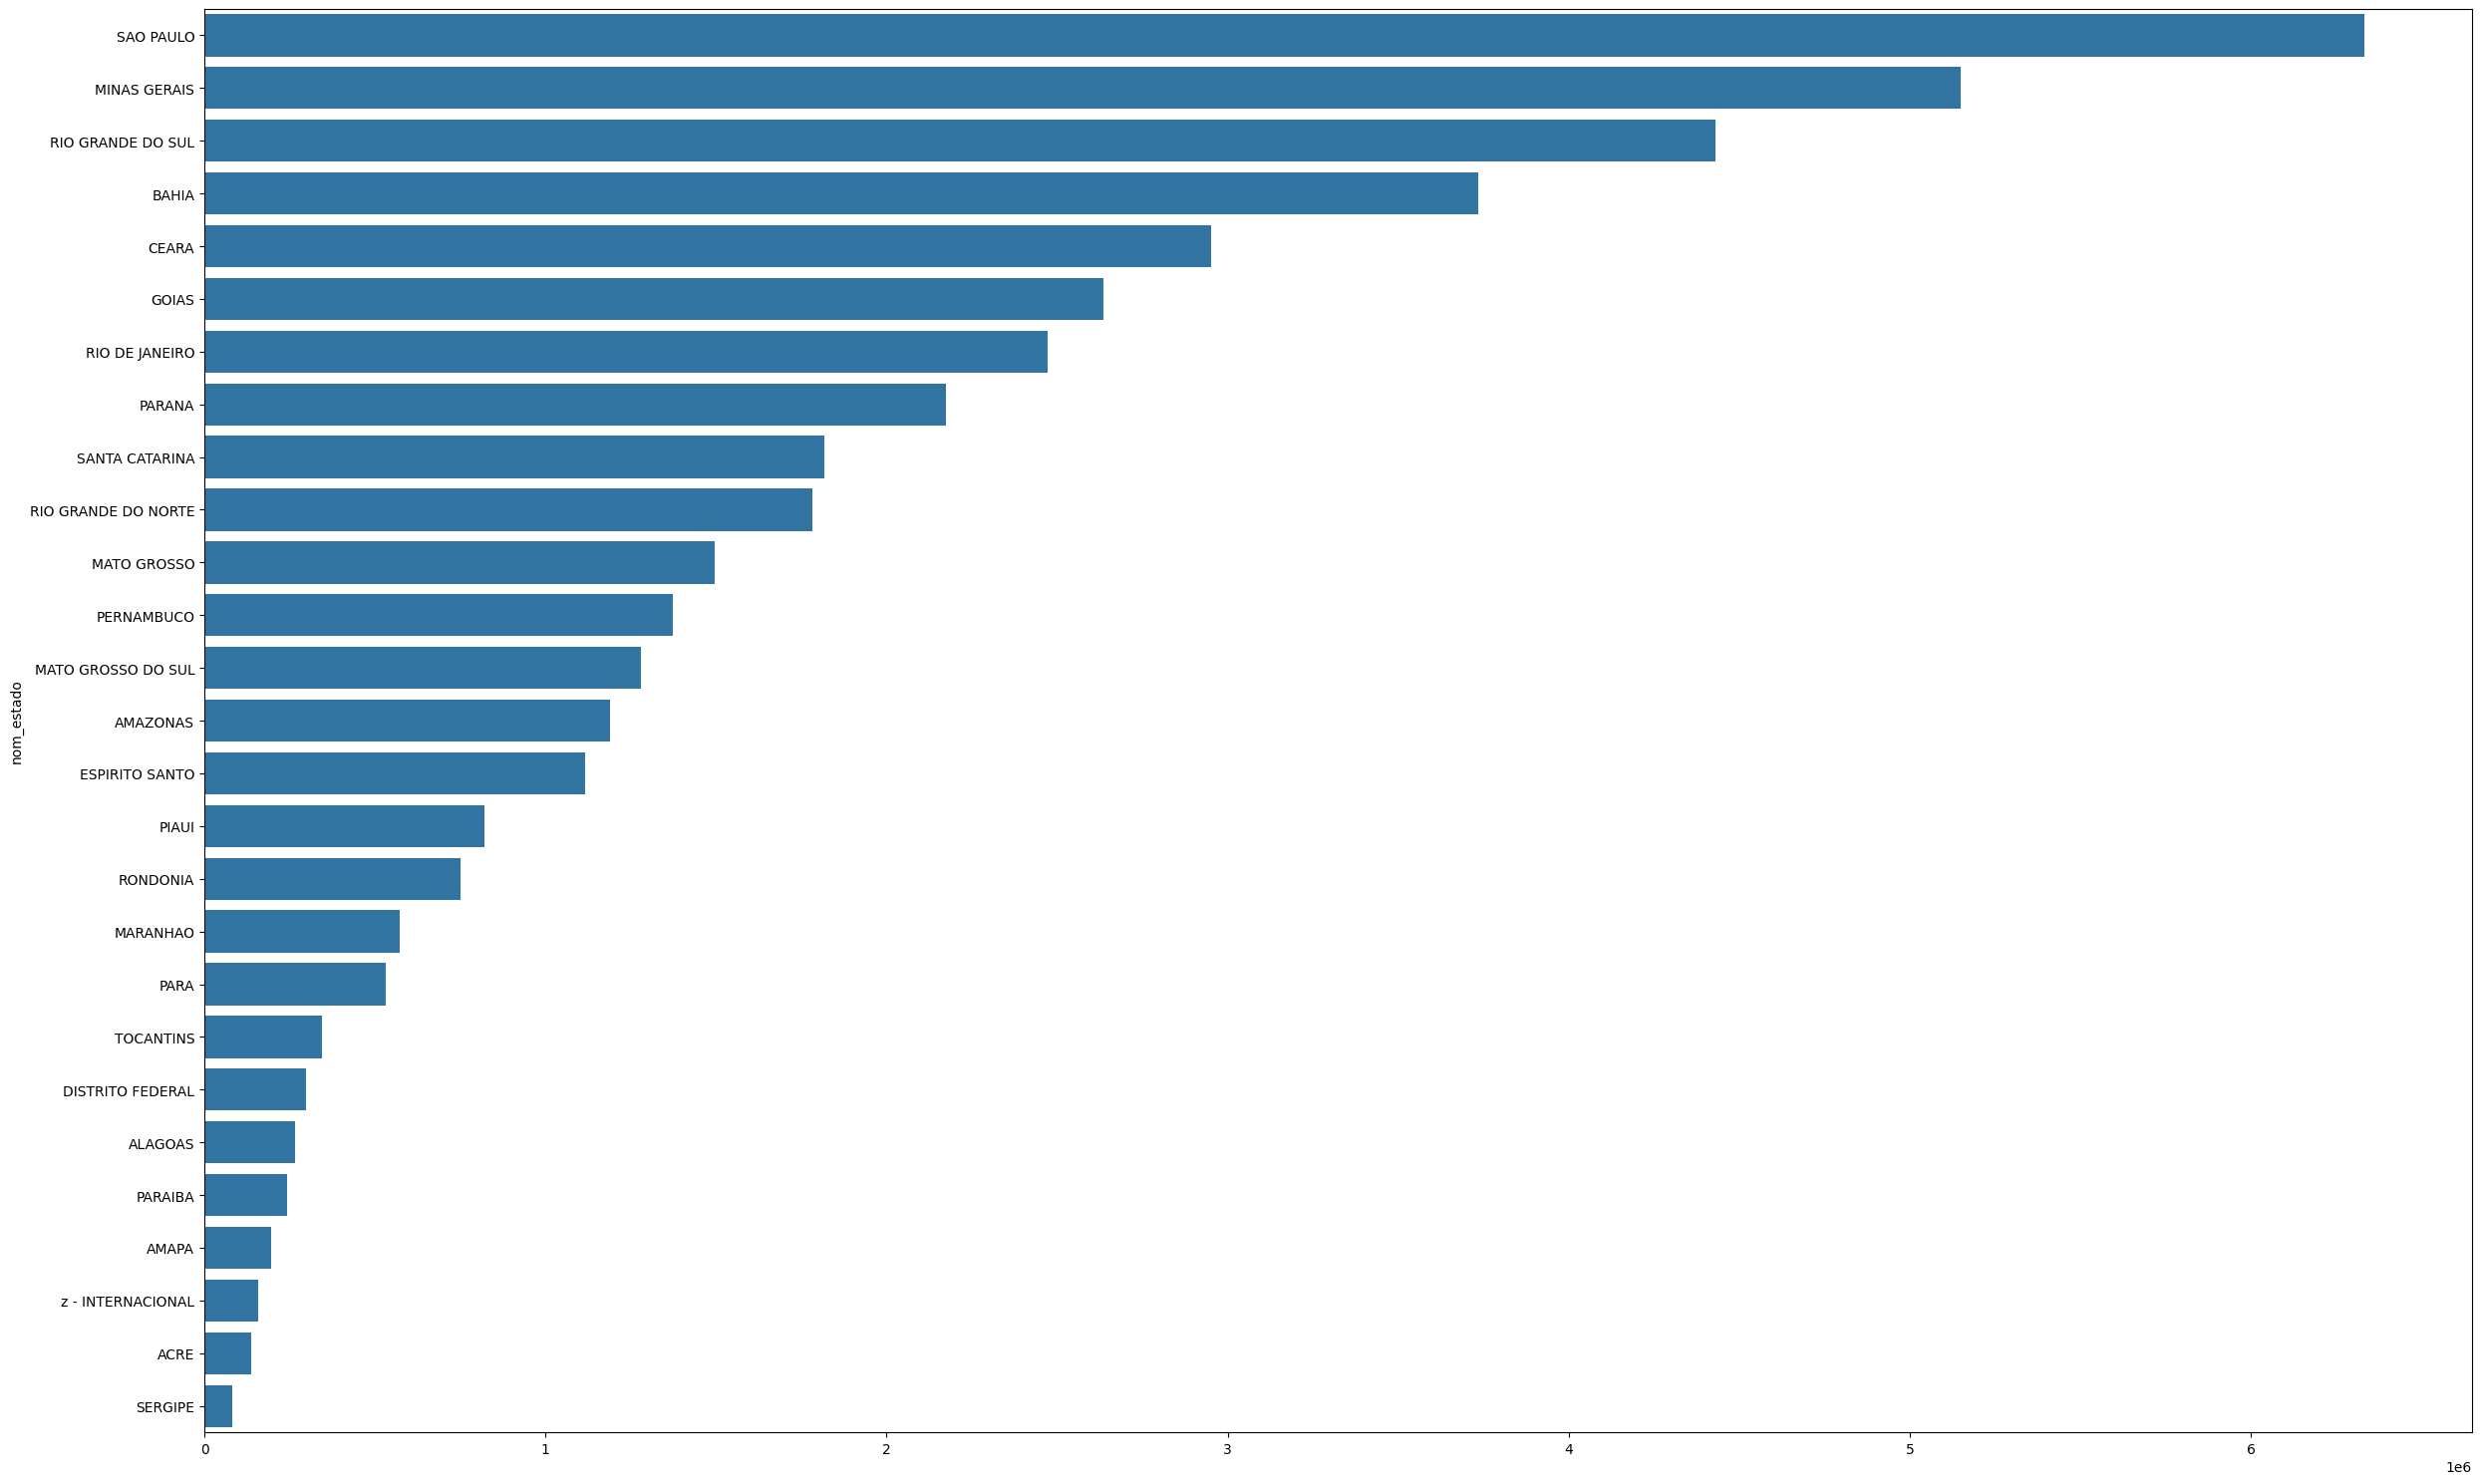

In [124]:
x = tabelas_mescladas['nom_estado'].value_counts().values 
y = tabelas_mescladas['nom_estado'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

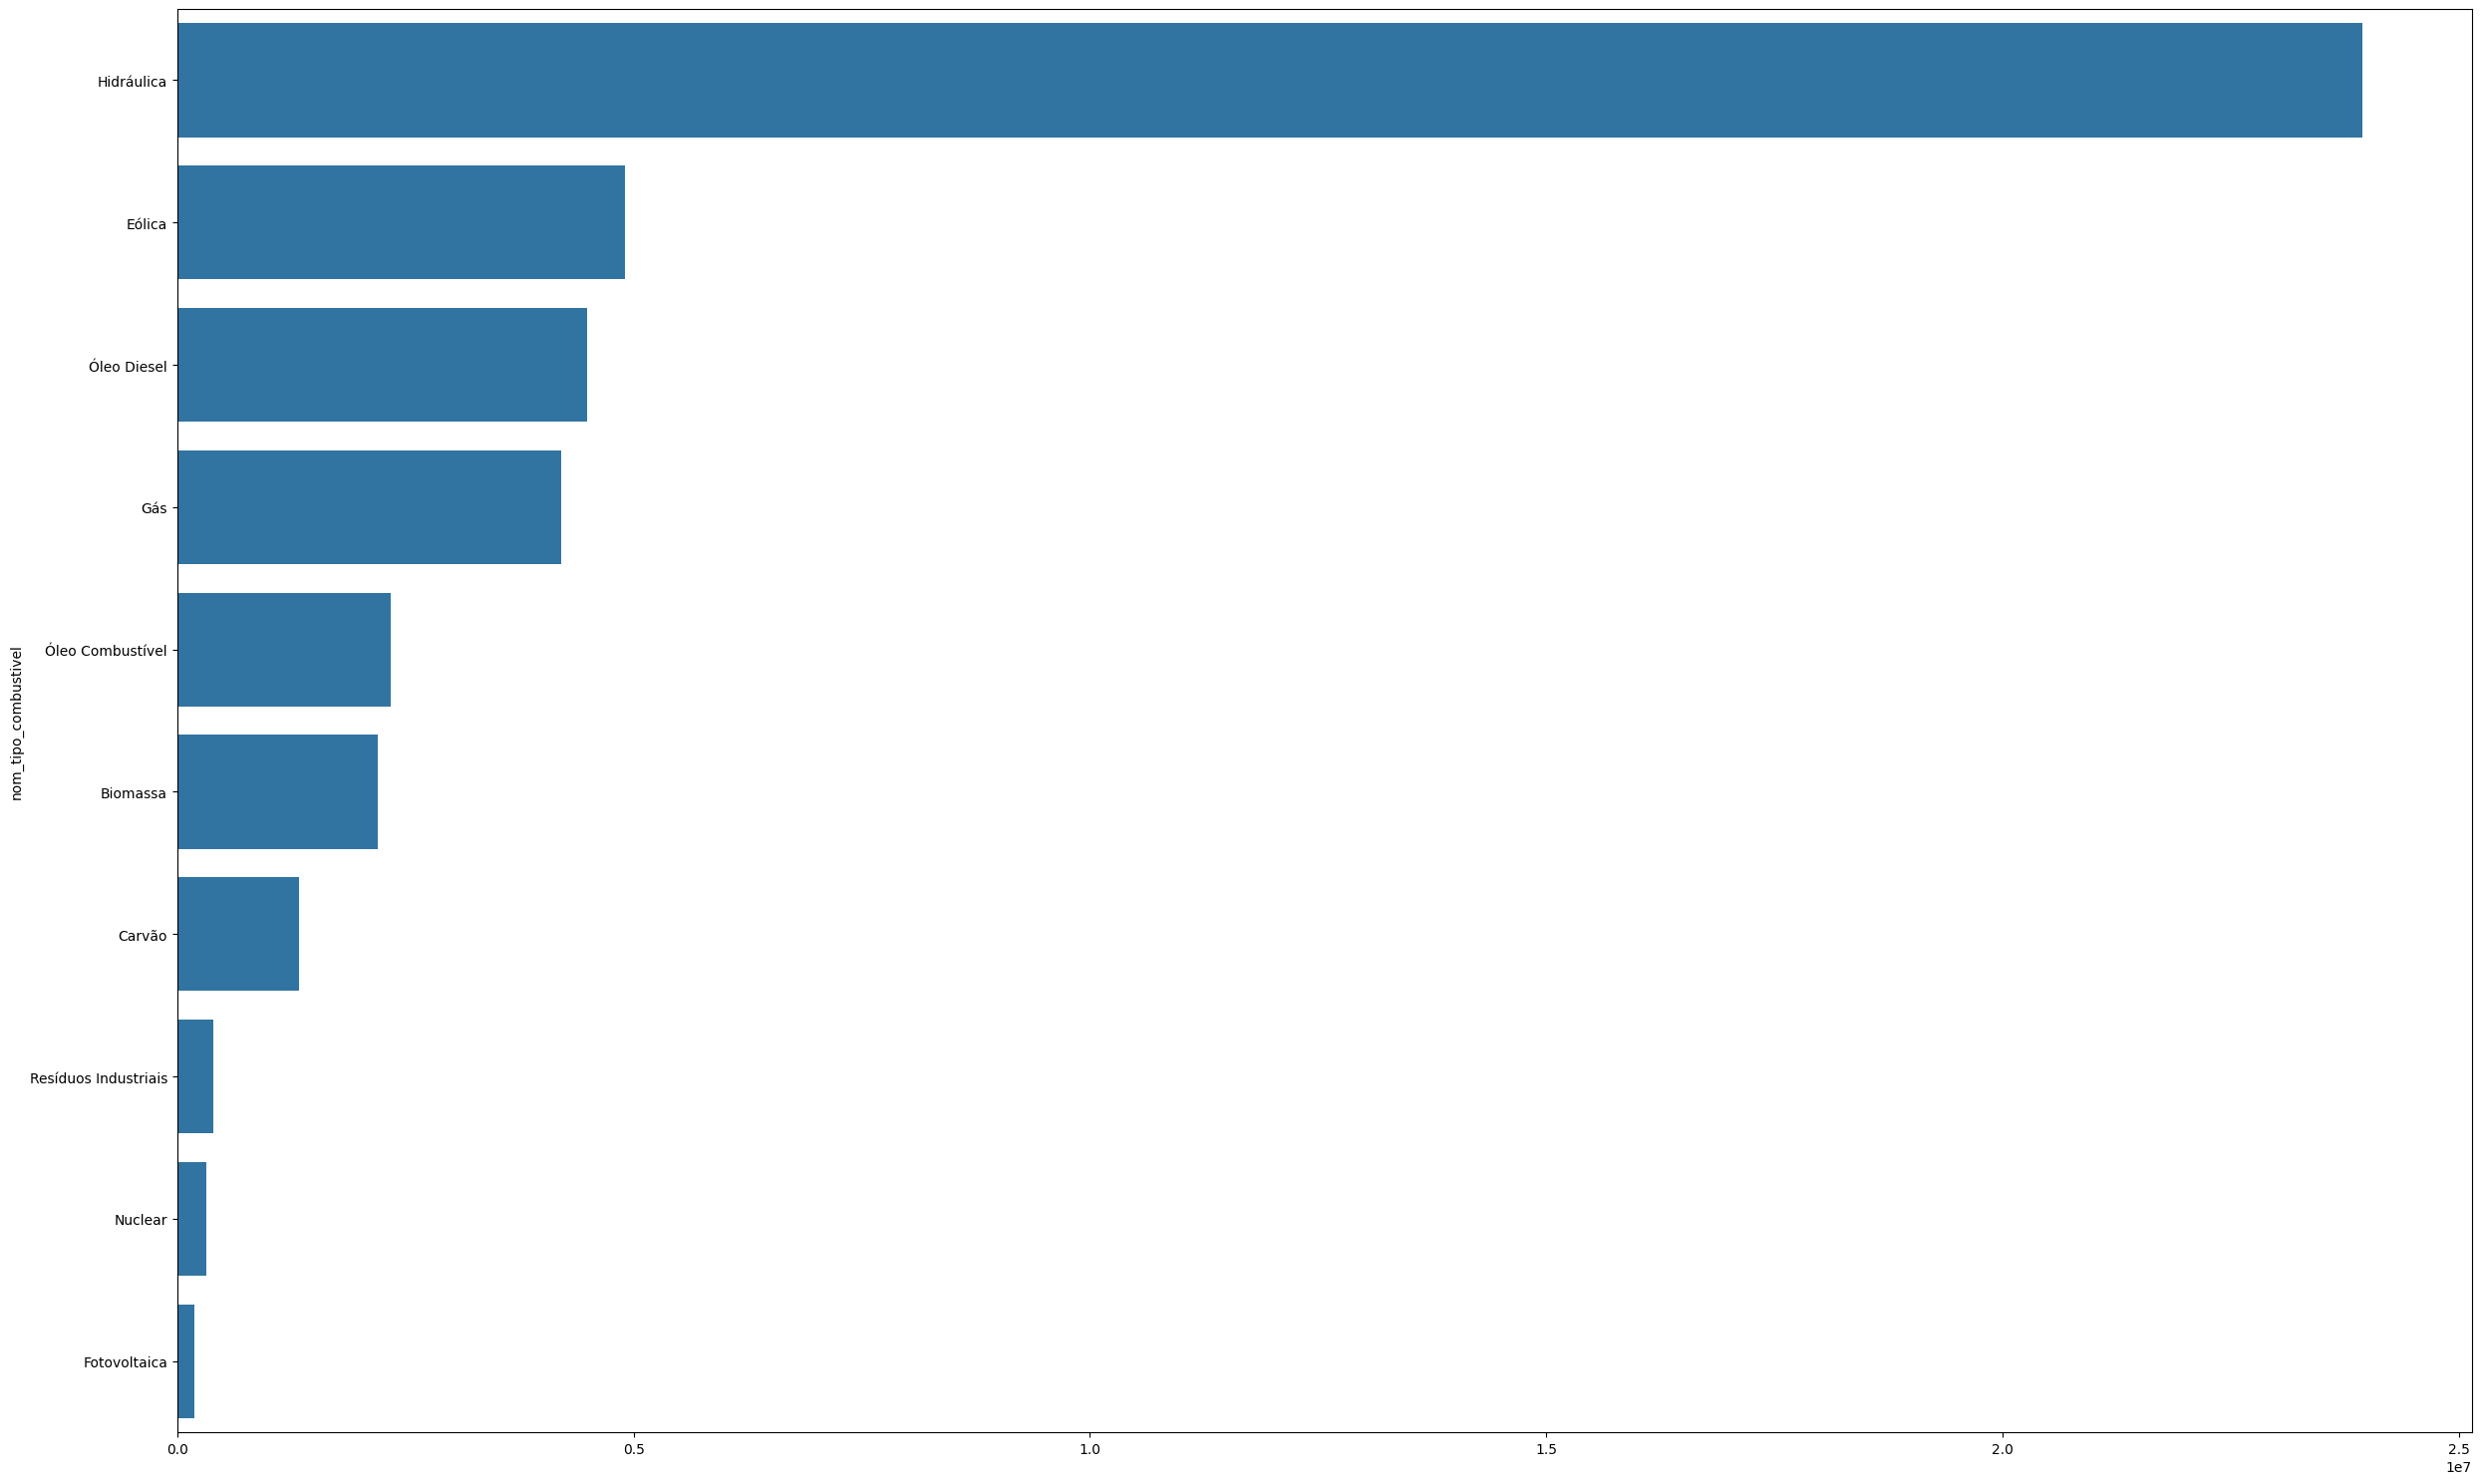

In [125]:
x = tabelas_mescladas['nom_tipo_combustivel'].value_counts().values
y = tabelas_mescladas['nom_tipo_combustivel'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

In [126]:
tabelas_mescladas.head(1)

,din_instante,nom_subsistema,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,val_geracao
7063,2000-03-01 15:00:00,SUDESTE,RIO DE JANEIRO,TIPO I,HIDROELÉTRICA,Hidráulica,Funil (Paraíba do Sul),0.4


### VERIFICANDO AS MÉDIA E MEDIANA DA GERAÇÃO DE ENERGIA POR SUBSISTEMA

In [127]:
Quantidade = tabelas_mescladas.groupby(["nom_subsistema"])["val_geracao"].count().rename('Quantidade')
media = tabelas_mescladas.groupby(['nom_subsistema'])['val_geracao'].mean().rename('Média Da Produção De Energia')
mediana =tabelas_mescladas.groupby(['nom_subsistema'])['val_geracao'].median().rename('Mediana Da Produção De Energia')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'Média Da Produção De Energia':media,'Mediana Da Produção De Energia':mediana})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,Média Da Produção De Energia,Mediana Da Produção De Energia
nom_subsistema,,,
SUDESTE,22298067,196.905789,50.416
NORDESTE,11252276,92.624456,7.000
SUL,8263134,162.357707,37.975
NORTE,2359848,332.856408,25.200
PARAGUAI,157470,4500.987302,4690.704


### VERIFICANDO AS MÉDIA E MEDIANA DA GERAÇÃO DE ENERGIA POR NOME DO ESTADO

In [128]:
Quantidade = tabelas_mescladas.groupby(["nom_estado"])["val_geracao"].count().rename('Quantidade')
media = tabelas_mescladas.groupby(['nom_estado'])['val_geracao'].mean().rename('Média Da Produção De Energia')
mediana =tabelas_mescladas.groupby(['nom_estado'])['val_geracao'].median().rename('Mediana Da Produção De Energia')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'Média Da Produção De Energia':media,'Mediana Da Produção De Energia':mediana})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,Média Da Produção De Energia,Mediana Da Produção De Energia
nom_estado,,,
SAO PAULO,6331095,193.083382,47.787
MINAS GERAIS,5147416,190.581203,71.270
RIO GRANDE DO SUL,4430668,59.137024,17.870
BAHIA,3735082,104.800233,19.000
CEARA,2952267,32.650226,1.211


### VERIFICANDO AS MÉDIA E MEDIANA DA GERAÇÃO DE ENERGIA POR MODELIDADE DE OPERAÇÃO

In [129]:
Quantidade = tabelas_mescladas.groupby(["cod_modalidadeoperacao"])["val_geracao"].count().rename('Quantidade')
media = tabelas_mescladas.groupby(['cod_modalidadeoperacao'])['val_geracao'].mean().rename('Média Da Produção De Energia')
mediana =tabelas_mescladas.groupby(['cod_modalidadeoperacao'])['val_geracao'].median().rename('Mediana Da Produção De Energia')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'Média Da Produção De Energia':media,'Mediana Da Produção De Energia':mediana})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,Média Da Produção De Energia,Mediana Da Produção De Energia
cod_modalidadeoperacao,,,
TIPO I,28967573,270.399202,68.0000
TIPO III,4562991,16.402551,1.0000
Conjunto de Usinas,2914538,52.564609,39.6675
Pequenas Usinas (Tipo III),2490865,57.650071,30.9700
TIPO II-C,2346082,13.096307,8.4680


### VERIFICANDO AS MÉDIA E MEDIANA DA GERAÇÃO DE ENERGIA POR TIPO DE USINA

In [130]:
Quantidade = tabelas_mescladas.groupby(["nom_tipousina"])["val_geracao"].count().rename('Quantidade')
media = tabelas_mescladas.groupby(['nom_tipousina'])['val_geracao'].mean().rename('Média Da Produção De Energia')
mediana =tabelas_mescladas.groupby(['nom_tipousina'])['val_geracao'].median().rename('Mediana Da Produção De Energia')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'Média Da Produção De Energia':media,'Mediana Da Produção De Energia':mediana})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,Média Da Produção De Energia,Mediana Da Produção De Energia
nom_tipousina,,,
HIDROELÉTRICA,23928303,291.247831,68.0300
TÉRMICA,14970914,59.091378,0.0000
EOLIELÉTRICA,4911012,32.177199,17.8640
NUCLEAR,314940,805.452736,646.3345
FOTOVOLTAICA,187940,17.497833,0.0000


### VERIFICANDO AS MÉDIA E MEDIANA DA GERAÇÃO DE ENERGIA POR TIPO DE COMBUSTIVEL

In [131]:
Quantidade = tabelas_mescladas.groupby(["nom_tipo_combustivel"])["val_geracao"].count().rename('Quantidade')
media = tabelas_mescladas.groupby(['nom_tipo_combustivel'])['val_geracao'].mean().rename('Média Da Produção De Energia')
mediana =tabelas_mescladas.groupby(['nom_tipo_combustivel'])['val_geracao'].median().rename('Mediana Da Produção De Energia')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'Média Da Produção De Energia':media,'Mediana Da Produção De Energia':mediana})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,Média Da Produção De Energia,Mediana Da Produção De Energia
nom_tipo_combustivel,,,
Hidráulica,23945989,291.032729,68.000
Eólica,4911012,32.177199,17.864
Óleo Diesel,4492013,8.754909,0.000
Gás,4203898,122.555867,23.100
Óleo Combustível,2341552,25.366313,0.000


#### A ENERGIA QUE MAIS PRODUZIU FOI A ENERGIA HIDROELÉTRICA, MAS VAMOS FAZER UMA BREVE ANÁLISE EM QUAL ESTADO E A MODELIDADE DE OPERAÇÃO MAIS UTILIZADO

In [132]:
hidroeletrica = tabelas_mescladas.loc[tabelas_mescladas['nom_tipousina'] == 'HIDROELÉTRICA']
hidroeletrica.head()

,din_instante,nom_subsistema,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,val_geracao
7063,2000-03-01 15:00:00,SUDESTE,RIO DE JANEIRO,TIPO I,HIDROELÉTRICA,Hidráulica,Funil (Paraíba do Sul),0.4
7283,2000-03-01 17:00:00,SUDESTE,RIO DE JANEIRO,TIPO I,HIDROELÉTRICA,Hidráulica,Funil (Paraíba do Sul),0.2
7731,2000-03-01 21:00:00,SUDESTE,RIO DE JANEIRO,TIPO I,HIDROELÉTRICA,Hidráulica,Funil (Paraíba do Sul),0.7
8171,2000-04-01 01:00:00,SUDESTE,RIO DE JANEIRO,TIPO I,HIDROELÉTRICA,Hidráulica,Funil (Paraíba do Sul),0.3
15082,2000-06-01 15:00:00,SUDESTE,SAO PAULO,TIPO I,HIDROELÉTRICA,Hidráulica,Limoeiro,0.9


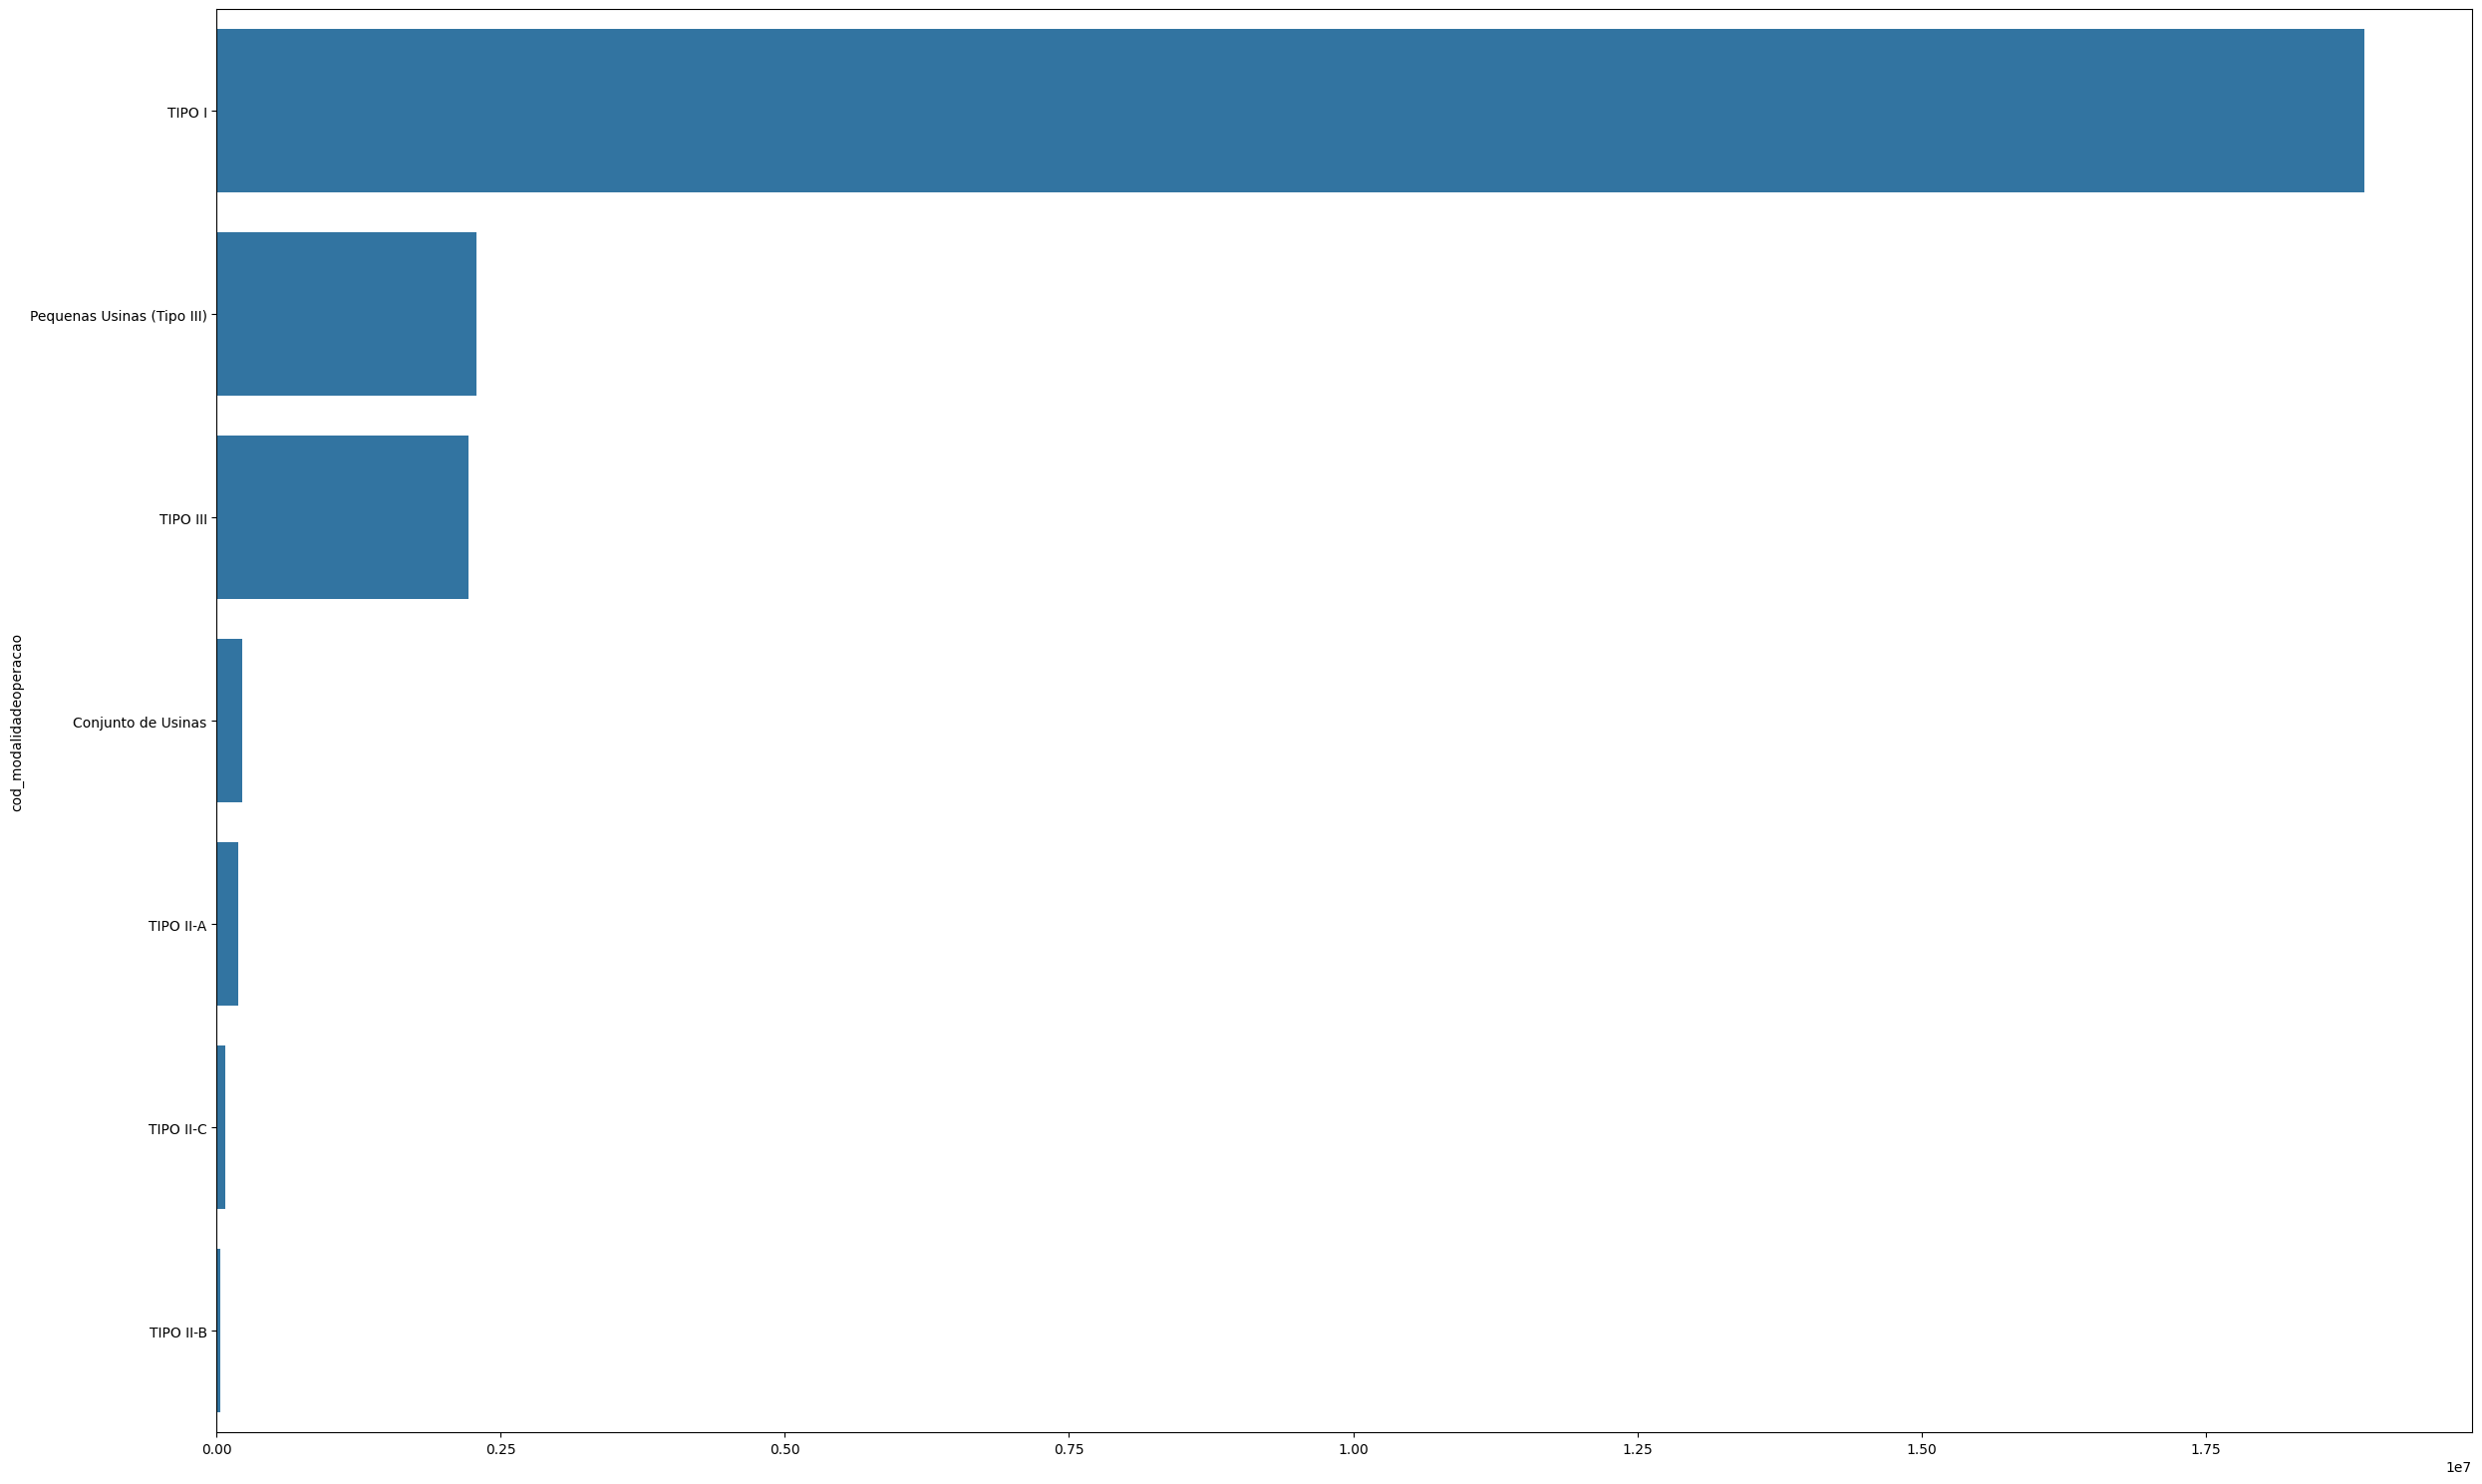

In [133]:
x = hidroeletrica['cod_modalidadeoperacao'].value_counts().values 
y = hidroeletrica['cod_modalidadeoperacao'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

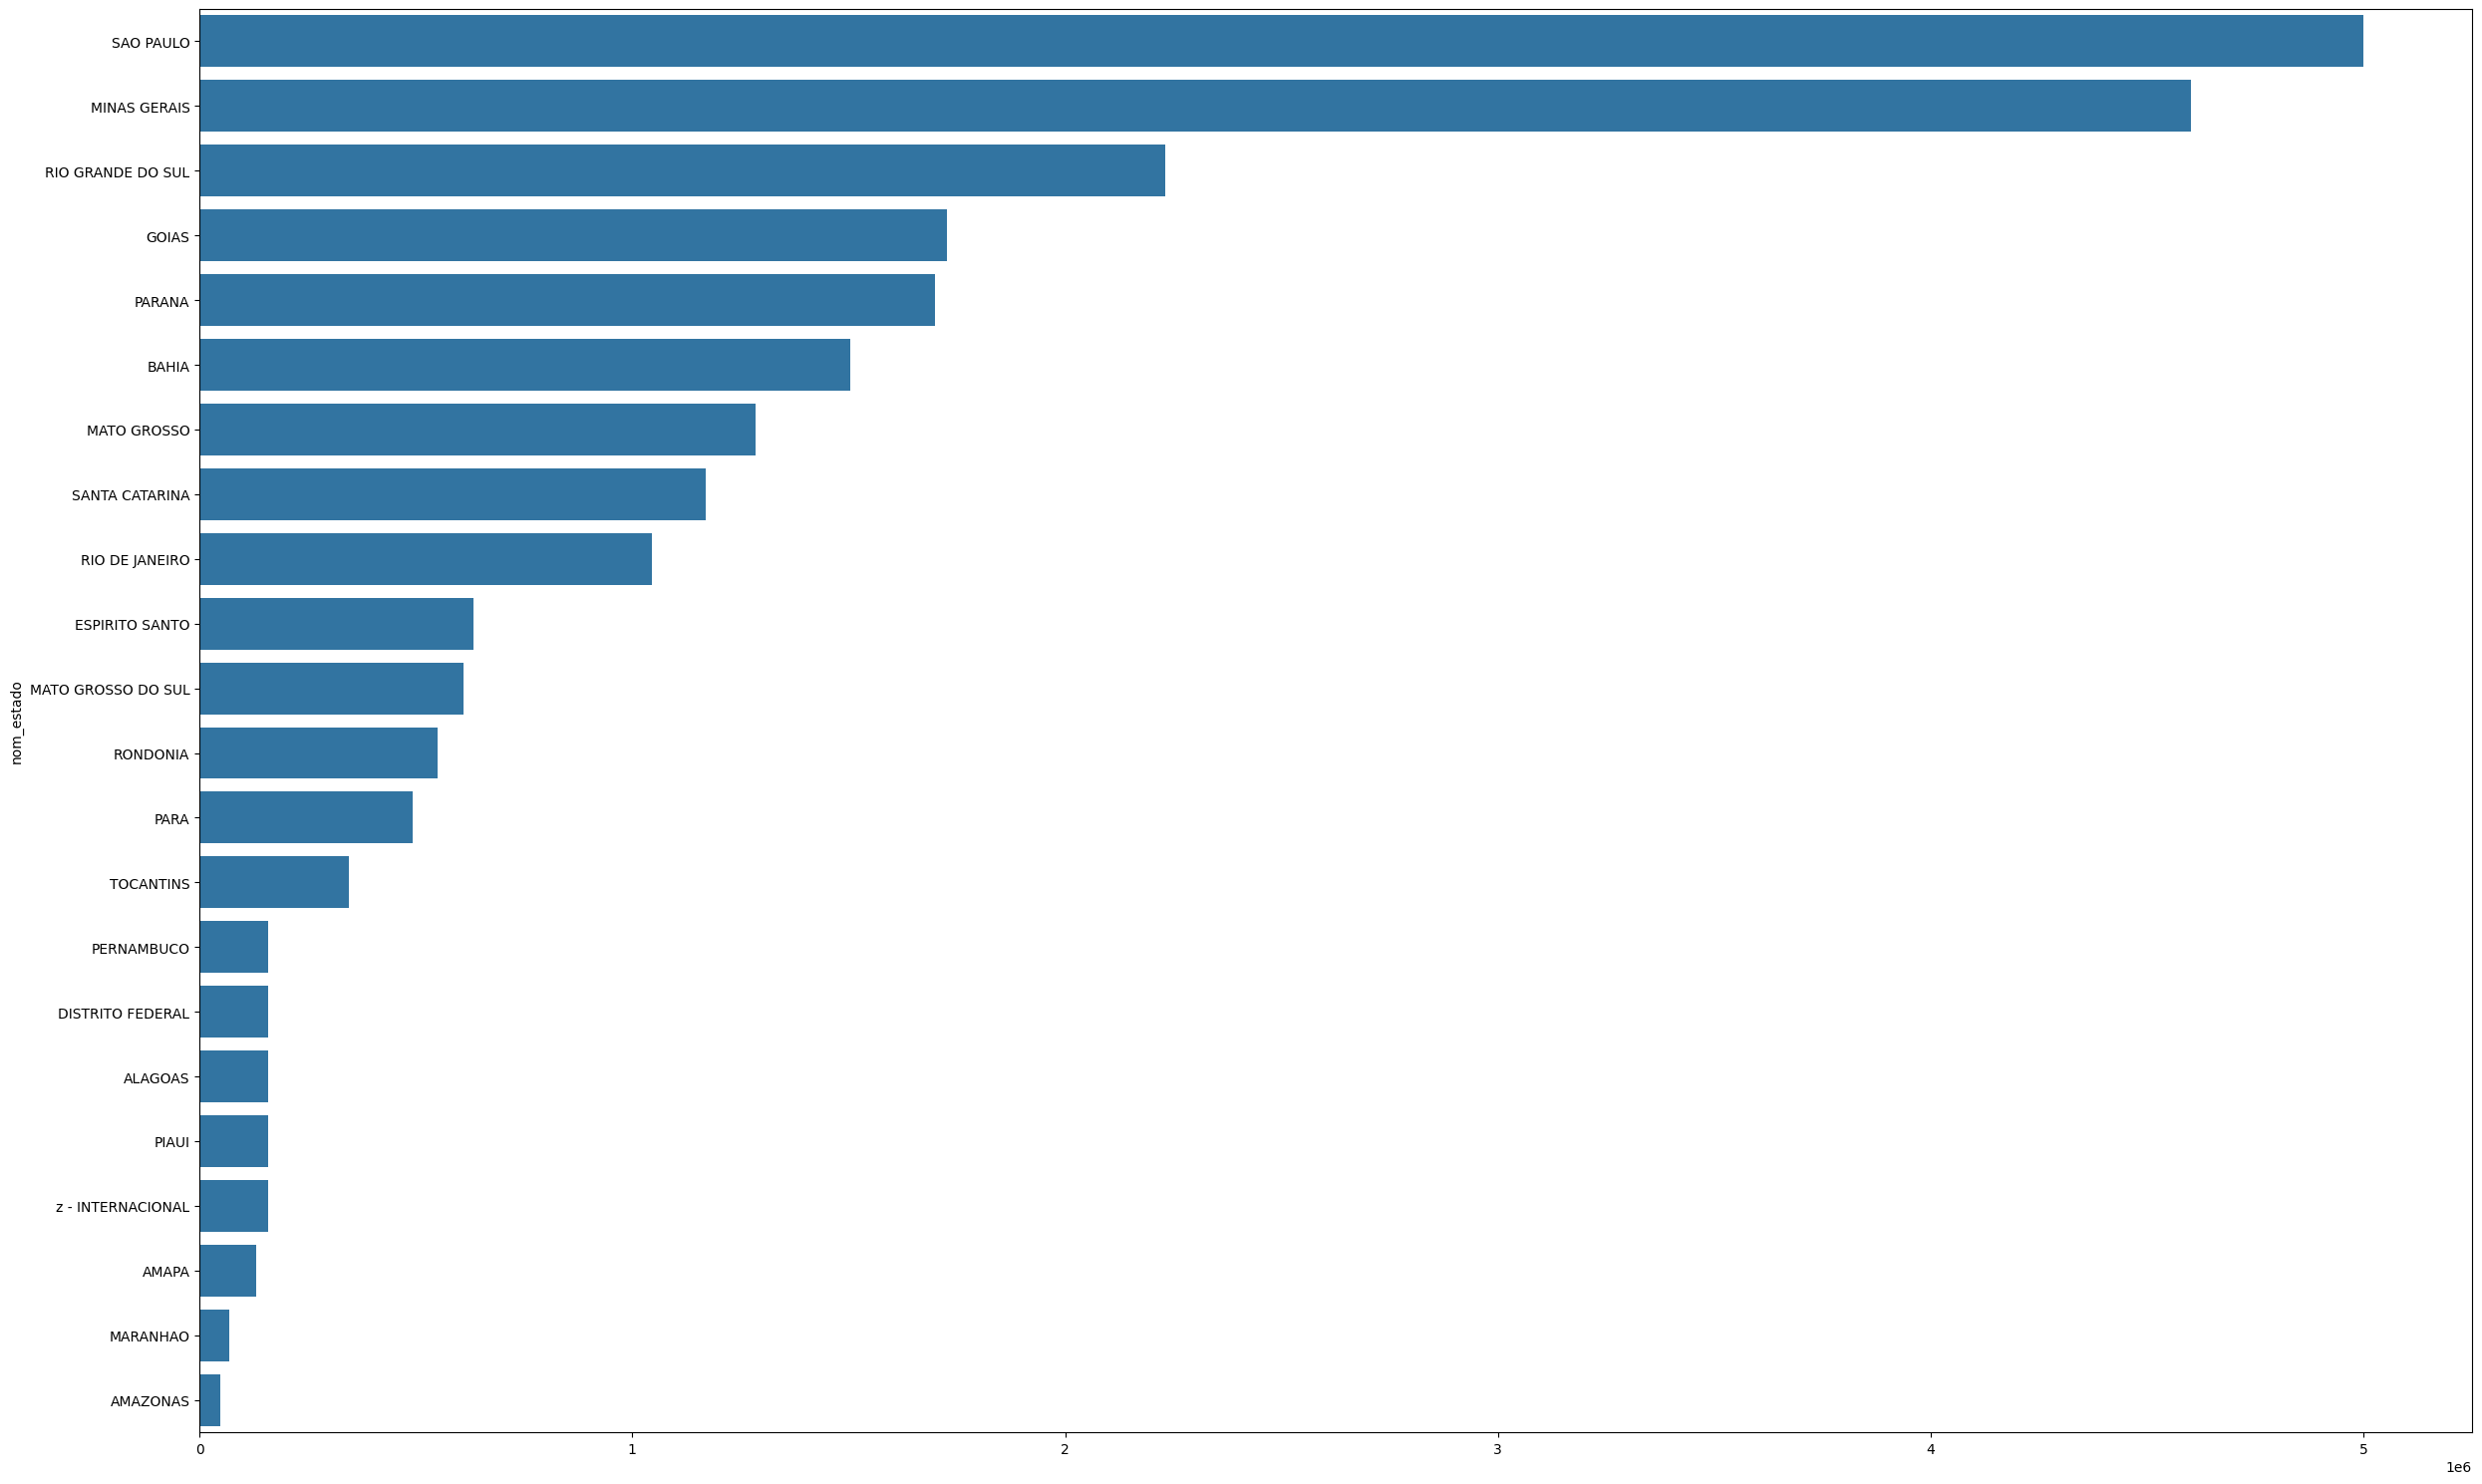

In [134]:
x = hidroeletrica['nom_estado'].value_counts().values 
y = hidroeletrica['nom_estado'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

### MÉDIA DE PRODUÇÃO DE ENERGIA HIDROELÉTRICA

In [135]:
Quantidade = hidroeletrica.groupby(["nom_estado"])["val_geracao"].count().rename('Quantidade')
media = hidroeletrica.groupby(['nom_estado'])['val_geracao'].mean().rename('Média Da Produção De Energia')
mediana =hidroeletrica.groupby(['nom_estado'])['val_geracao'].median().rename('Mediana Da Produção De Energia')

# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'Média Da Produção De Energia':media,'Mediana Da Produção De Energia':mediana})

dados_usuarios.sort_values("Média Da Produção De Energia", ascending=False).head(5)

,Quantidade,Média Da Produção De Energia,Mediana Da Produção De Energia
nom_estado,,,
z - INTERNACIONAL,157470,4500.987302,4690.704
ALAGOAS,157470,1699.203289,1674.900
PARA,492999,1336.888552,30.390
PARANA,1700259,826.721827,244.028
PERNAMBUCO,157471,690.017669,663.000


# CONSTRUÇÃO DA MAQUINA PREDITIVA

## PRÉ-PROCESSAMENTO

In [136]:
tabelas_mescladas.tail()

,din_instante,nom_subsistema,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,nom_usina,val_geracao
4288651,2018-12-31 23:00:00,SUDESTE,SAO PAULO,TIPO III,TÉRMICA,Biomassa,Colorado,21.000
4288652,2018-12-31 23:00:00,SUDESTE,SAO PAULO,TIPO III,TÉRMICA,Biomassa,Guarani Cruz Alta,13.000
4288653,2018-12-31 23:00:00,SUDESTE,TOCANTINS,TIPO I,HIDROELÉTRICA,Hidráulica,São Salvador,119.600
4288654,2018-12-31 23:00:00,SUDESTE,TOCANTINS,TIPO I,HIDROELÉTRICA,Hidráulica,Lajeado,476.403
4288655,2018-12-31 23:00:00,SUDESTE,TOCANTINS,TIPO I,HIDROELÉTRICA,Hidráulica,Peixe Angical,301.851


In [137]:
del tabelas_mescladas['nom_usina']

In [138]:
tabelas_mescladas.head(1)

,din_instante,nom_subsistema,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipo_combustivel,val_geracao
7063,2000-03-01 15:00:00,SUDESTE,RIO DE JANEIRO,TIPO I,HIDROELÉTRICA,Hidráulica,0.4


In [139]:
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
tabelas_mescladas['nom_subsistema'] = lb.fit_transform(tabelas_mescladas['nom_subsistema'])
tabelas_mescladas['nom_estado'] = lb.fit_transform(tabelas_mescladas['nom_estado'])
tabelas_mescladas['nom_tipousina'] = lb.fit_transform(tabelas_mescladas['nom_tipousina'])
tabelas_mescladas['nom_tipo_combustivel'] = lb.fit_transform(tabelas_mescladas['nom_tipo_combustivel'])
tabelas_mescladas['cod_modalidadeoperacao'] = lb.fit_transform(tabelas_mescladas['cod_modalidadeoperacao'])
# Remove valores missing eventualmente gerados
tabelas_mescladas.dropna(inplace = True)

In [140]:
#Separa X e y  
X = tabelas_mescladas[['nom_subsistema','nom_estado','cod_modalidadeoperacao','nom_tipousina','nom_tipo_combustivel']]
y = tabelas_mescladas.iloc[:, -1]

In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44330795 entries, 7063 to 4288655
Data columns (total 5 columns):
 #   Column                  Dtype
---  ------                  -----
 0   nom_subsistema          int32
 1   nom_estado              int32
 2   cod_modalidadeoperacao  int32
 3   nom_tipousina           int32
 4   nom_tipo_combustivel    int32
dtypes: int32(5)
memory usage: 1.2 GB


In [142]:
y.head(1)

7063    0.4
Name: val_geracao, dtype: float64

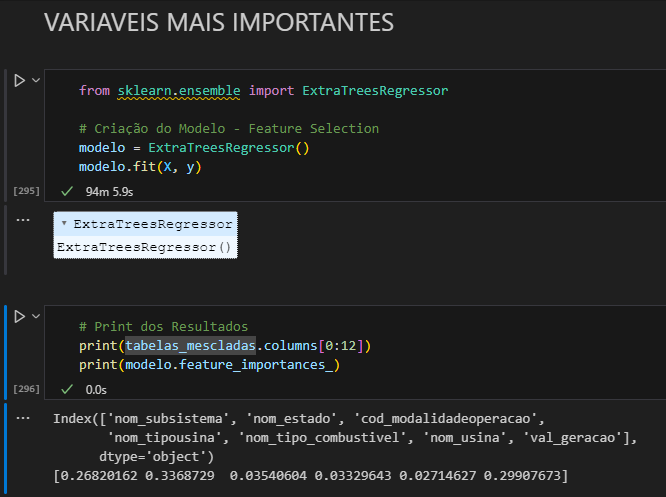

In [143]:
from IPython.display import display, Image

# Substitua 'caminho/para/sua/imagem.jpg' pelo caminho real para a sua imagem
caminho_imagem = 'modelo importantes.PNG'

# Exibir a imagem
display(Image(filename=caminho_imagem))


### AGRUPANDO OS DADOS POR ESTADO PARA A PREVISÃO

In [144]:
estado = tabelas_mescladas[['din_instante','nom_estado','val_geracao']]
estado.head(1)

,din_instante,nom_estado,val_geracao
7063,2000-03-01 15:00:00,18,0.4


### ALTERANDO OS NOMES DO INDEX E DA COLUNA 

In [145]:
estado = estado.rename(columns={'din_instante': 'ds'})

In [146]:
estado = estado.rename(columns={'val_geracao': 'y'})


In [147]:
estado.head()

,ds,nom_estado,y
7063,2000-03-01 15:00:00,18,0.4
7283,2000-03-01 17:00:00,18,0.2
7731,2000-03-01 21:00:00,18,0.7
8171,2000-04-01 01:00:00,18,0.3
15082,2000-06-01 15:00:00,23,0.9


## Criado o modelo de IA
**A MEMORIA ALOCADA NO MEU PC NÃO SUPORTOU A QUANTIDADE DE DADOS EXIGIDOS DE 2000 A 2018, TIVE QUE FAZER UMA AMOSTRA PRA TREINAR O MODELO**

In [148]:
# Biblioteca Prophet
from prophet import Prophet

# Criando uma amostra do conjunto de dados
amostra_tamanho = 3000000
amostra = estado.sample(amostra_tamanho)

# modelo Prophet
model = Prophet()

# Ajuste o modelo aos dados históricos
model.fit(amostra)

10:57:12 - cmdstanpy - INFO - Chain [1] start processing
11:08:28 - cmdstanpy - INFO - Chain [1] done processing


## VALIDANDO O MODELO

### IMPORTANDO, TRATANDO E MANIPULANDO DADOS 2019

In [149]:
validacao = pd.read_csv('GERACAO_USINA_2019.csv', sep=';', decimal='.')

In [150]:
validacao_val = validacao[['din_instante','nom_estado','val_geracao']]

### CONVERETENDO O TIPO DAS VARIAVÉIS

In [151]:
validacao_val['din_instante'] = pd.to_datetime(validacao_val['din_instante'], format='%Y-%m-%d %H:%M:%S')

In [152]:
validacao_val['val_geracao'] = pd.to_numeric(validacao_val['val_geracao'], errors='coerce')

In [153]:
validacao_val['nom_estado'] = lb.fit_transform(validacao_val['nom_estado'])
# Remove valores missing eventualmente gerados
validacao_val.dropna(inplace = True)

### ALTERANDO O NOME DAS VARIAVÉIS

In [154]:
validacao_val = validacao_val.rename(columns={'val_geracao': 'y'})

In [155]:
validacao_val = validacao_val.rename(columns={'din_instante': 'ds'})

In [156]:
validacao_val.head(1)

,ds,nom_estado,y
0,2019-01-01,3,82.993


### IMPORTANDO, TRATANDO E MANIPULANDO DADOS 2020


In [157]:
validacao1 = pd.read_csv('GERACAO_USINA_2020.csv', sep=';', decimal='.')

In [158]:
validacao_val1 = validacao1[['din_instante','nom_estado','val_geracao']]

### CONVERETENDO O TIPO DAS VARIAVÉIS

In [159]:
validacao_val1['val_geracao'] = pd.to_numeric(validacao_val1['val_geracao'], errors='coerce')

In [160]:
validacao_val1['din_instante'] = pd.to_datetime(validacao_val1['din_instante'], format='%Y-%m-%d %H:%M:%S')

In [161]:
validacao_val1['nom_estado'] = lb.fit_transform(validacao_val1['nom_estado'])
# Remove valores missing eventualmente gerados
validacao_val1.dropna(inplace = True)

### ALTERANDO O NOME DAS VARIAVEIS

In [162]:
validacao_val1 = validacao_val1.rename(columns={'din_instante': 'ds'})

In [163]:
validacao_val1 = validacao_val1.rename(columns={'val_geracao': 'y'})

In [164]:
validacao_val1.head(1)

,ds,nom_estado,y
0,2020-01-01,3,143.411


### JUNTANDO AS TABELAS DOS DADOS DE 2019  E DE 2020 PARA A VALIDAÇÃO - PREDIÇÃO

In [165]:
previsao = tabelas_mescladas = pd.concat([validacao_val, validacao_val1])
previsao.head()

,ds,nom_estado,y
0,2019-01-01,3,82.993
1,2019-01-01,3,14.032
2,2019-01-01,3,65.343
3,2019-01-01,3,50.980
4,2019-01-01,3,0.000


In [166]:
previsao.shape

(8840498, 3)

### FAZENDO A PREDIÇÃO EM 1 MÊS

In [167]:
# Criando uma amostra do conjunto de dados
amostra_predicao = 340467
previsao_teste = previsao.tail(amostra_predicao)  # Selecionando as últimas 'amostra_predicao' linhas para usar como conjunto de teste

# Fazendo previsões para a variável 'previsao_teste' para um mês
future_teste = model.make_future_dataframe(periods=31, freq='D')  # prevendo 1 mês
forecast_teste = model.predict(future_teste)

In [168]:
forecast_teste.head(1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-02-04 07:00:00,422.153839,-290.010775,1139.126322,422.153839,422.153839,3.976699,3.976699,3.976699,-14.131524,-14.131524,-14.131524,7.470678,7.470678,7.470678,10.637544,10.637544,10.637544,0.0,0.0,0.0,426.130537


## Visualizando o Resultado

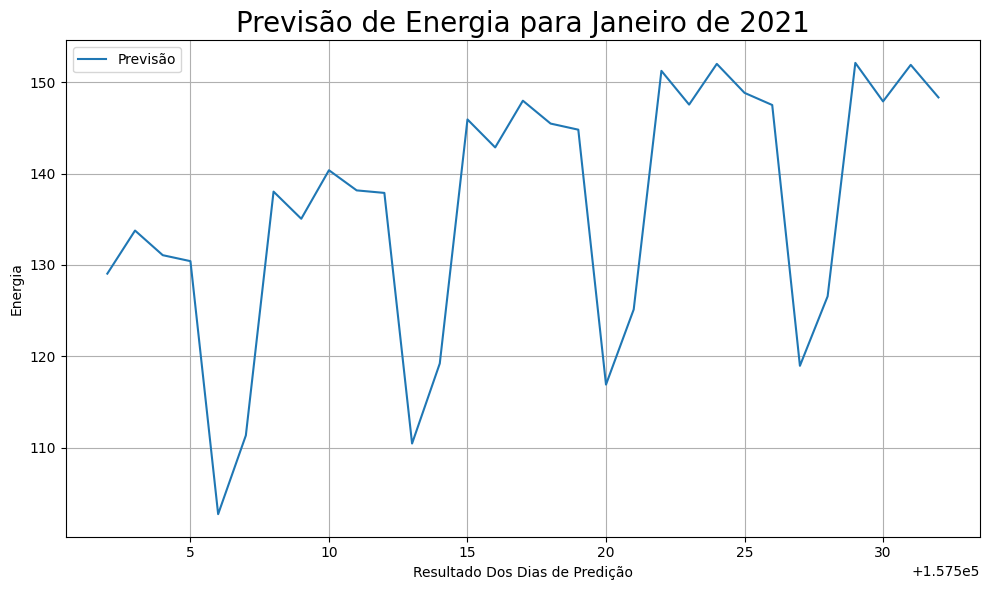

In [182]:
# Criando um gráfico
plt.figure(figsize=(10, 6))
plt.plot(forecast_values.index, forecast_values.values, label='Previsão')
plt.xlabel('Resultado Dos Dias de Predição')
plt.ylabel('Energia')
plt.title('Previsão de Energia para Janeiro de 2021')
plt.legend()
plt.grid(True)
plt.show()


In [170]:
# Acessando os valores da previsão
forecast_values = forecast_teste['yhat'].tail(31)

# Imprimindo os valores da previsão
print(forecast_values)

157502    129.055048
157503    133.764763
157504    131.073130
157505    130.419323
157506    102.765448
157507    111.372013
157508    138.021948
157509    135.051935
157510    140.357466
157511    138.155738
157512    137.879325
157513    110.486182
157514    119.235163
157515    145.910031
157516    142.850730
157517    147.958316
157518    145.457680
157519    144.791001
157520    116.927487
157521    125.138604
157522    151.221764
157523    147.531256
157524    151.982832
157525    148.816083
157526    147.487556
157527    118.980166
157528    126.578128
157529    152.090378
157530    147.881274
157531    151.874986
157532    148.317735
Name: yhat, dtype: float64


### AVALIANDO O MODELO

In [173]:
# Redimensionando o conjunto de dados de teste para corresponder ao tamanho do conjunto de dados de previsão
previsao_teste = previsao.sample(len(forecast_teste))

# Obtendo os valores verdadeiros e previstos
y_true = previsao_teste['y'].values 
y_pred = forecast_teste['yhat'].values

# Calcular o Erro Absoluto Médio (MAE)
mae = np.mean(np.abs(y_true - y_pred))
print(f"Erro Absoluto Médio (MAE): {mae}")

# Calcular o Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse}")


Erro Absoluto Médio (MAE): 220.16513523932733
Raiz do Erro Quadrático Médio (RMSE): 416.3215574666702
